# **GeoMAPCLIP Demo:** Worldwide Map Image Geo-localization 🌎📍

## GeoMapCLIP is a fine-tuned GeoCLIP for map images.

## For more information about GeoCLIP, please check out their [paper](https://arxiv.org/abs/2309.16020v2) and [GitHub repository](https://github.com/VicenteVivan/geo-clip)

This notebook will compare how the cooridnate inference results change by comparing GeoCLIP predictions with GeoMapCLIP.

1. GeoCLIP was trained with natural images such as twitter images.
2. GeoMapCLIP was fine-tuned with map tiles on top of GeoCLIP weights. 
3. By comparing 1 and 2, we can find out how fine-tuning affects the predictions of cooridinates for map images.

## Setting Up Your Environment 🛠️

To ensure a much faster inference, please follow these steps to use a GPU runtime:

1. Go to the menu at the top of this notebook, and select `Runtime` > `Change runtime type`.
2. Under `Hardware accelerator`, select `GPU` and click `Save`.
3. You can verify the GPU allocated to this session by running the following cell:

In [17]:
import sys, os
import torch

## Installation 📦

In [18]:
%pip install geoclip

Note: you may need to restart the kernel to use updated packages.


In [19]:
%pip install  geomapclip

# if you want to locally modify the GeoMapCLIP, do this
# Adds the parent directory of the notebook (i.e., repo root)
# sys.path.append(os.path.abspath(".."))

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries and Model Initialization 🛠️

In [20]:
from geoclip import GeoCLIP

gc_model = GeoCLIP().to("cpu")
print("===========================")
print("GeoCLIP has been loaded! 🎉")
print("===========================")

GeoCLIP has been loaded! 🎉


/Users/junghawoo/anaconda3/envs/tensorflow_m3/lib/python3.11/site-packages/geoclip/model/location_encoder.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_stat

## import libraries and GeoMapCLIP model Initialization 

In [21]:
from geomapclip import GeoMapCLIP

gmc_device = "cpu"

gmc_model = GeoMapCLIP().to(gmc_device)
print("===========================")
print("GeoMapCLIP has been loaded! 🎉")
print("===========================")


GeoMapCLIP has been loaded! 🎉


/Users/junghawoo/Documents/github/geomap-clip/geomapclip/model/location_encoder.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(f"{file_

In [22]:
# if the kernel does not have them, install these packages
%pip install matplotlib
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Image Upload & Display
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Heatmap
import folium
from folium.plugins import HeatMap

## Uploading an Image 🌃

## If you want to upload your own image, please upload one to the file explorer, and update the image_path accordingly.

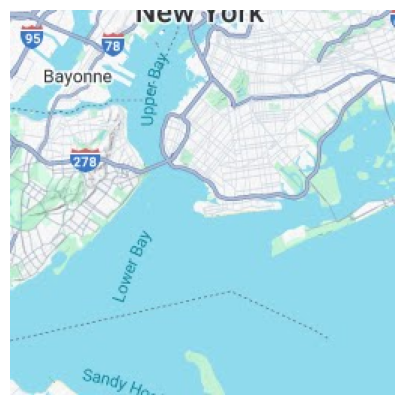

In [24]:
#upload your image and put the path here
from PIL import Image
#image_path = "./img_uploads/10_301_384.png"  # Update with the path to your file
image_path = "./img_uploads/10_301_385.png"  # Update with the path to your file


# Open the image file (replace with your local path)
image = Image.open(image_path)

# Show Image
image = Image.open(image_path)
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.show()

## Making Predictions 🗺️📍

In [25]:
# Make predictions
top_pred_gps, top_pred_prob = gc_model.predict(image_path, top_k=50)

# Display the top 5 GPS predictions
print("Top 5 GPS Predictions by GeoCLIP 📍")
print("========================")
for i in range(5):
    lat, lon = top_pred_gps[i]
    print(f"Prediction {i+1}: ({lat:.6f}, {lon:.6f}) - Probability: {top_pred_prob[i]:.6f}")

Top 5 GPS Predictions by GeoCLIP 📍
Prediction 1: (40.628880, -74.068146) - Probability: 0.024057
Prediction 2: (40.646652, -74.064331) - Probability: 0.020160
Prediction 3: (40.642452, -74.072311) - Probability: 0.017864
Prediction 4: (40.648705, -74.064911) - Probability: 0.017332
Prediction 5: (40.619293, -73.832069) - Probability: 0.014185


## GeoMapCLIP predictions

In [26]:
#Make predictions for GeoMapClip  TODO: replace model with our GeoMapClip
GM_top_pred_gps, GM_top_pred_prob = gmc_model.predict(image_path, top_k=50)

# Display the top 5 GPS predictions
print("Top 5 GPS Predictions by GeoMapCLIP 📍")
print("========================")
for i in range(5):
    lat, lon = GM_top_pred_gps[i]
    print(f"Prediction {i+1}: ({lat:.6f}, {lon:.6f}) - Probability: {GM_top_pred_prob[i]:.6f}")

Top 5 GPS Predictions by GeoMapCLIP 📍
Prediction 1: (40.847061, -74.003906) - Probability: 0.096377
Prediction 2: (40.847061, -72.597656) - Probability: 0.077176
Prediction 3: (40.847061, -73.652344) - Probability: 0.042105
Prediction 4: (40.847061, -72.949219) - Probability: 0.041165
Prediction 5: (41.112469, -73.300781) - Probability: 0.017862


## Visualize Heatmap 🌎 🔍

In [27]:
# Set top coordinates to plot the heatmap (<= top_k)
top_n_coordinates = 10

gps_coordinates = top_pred_gps.tolist()[:top_n_coordinates]
probabilities = top_pred_prob.tolist()[:top_n_coordinates]

total_prob = sum(probabilities)
normalized_probs = [prob / total_prob for prob in probabilities]

# Combine coordinates with normalized probabilities
weighted_coordinates = [(lat, lon, weight) for (lat, lon), weight in zip(gps_coordinates, normalized_probs)]

# Calculate the average location to center the map
avg_lat = sum(lat for lat, lon, weight in weighted_coordinates) / len(weighted_coordinates)
avg_lon = sum(lon for lat, lon, weight in weighted_coordinates) / len(weighted_coordinates)

# Create a map centered around the average coordinates
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=2.2)

# Define the color gradient
magma = {
    0.0: '#932667',
    0.2: '#b5367a',
    0.4: '#d3466b',
    0.6: '#f1605d',
    0.8: '#fd9668',
    1.0: '#fcfdbf'
}


gradient = {str(k): v for k, v in magma.items()}

HeatMap(weighted_coordinates, gradient=gradient).add_to(m)

# Mark top coordinate
top_coordinate = gps_coordinates[0]
top_probability = normalized_probs[0]

folium.Marker(
    location=top_coordinate,
    popup=f"Top Prediction: {top_coordinate} with probability {top_probability:.4f}",
    icon=folium.Icon(color='orange', icon='star')
).add_to(m)


############################################ Draw result for GeoMapClip################################
GM_gps_coordinates = GM_top_pred_gps.tolist()[:top_n_coordinates]
probabilities = GM_top_pred_prob.tolist()[:top_n_coordinates]

total_prob = sum(probabilities)
normalized_probs = [prob / total_prob for prob in probabilities]

# Combine coordinates with normalized probabilities
weighted_coordinates = [(lat, lon, weight) for (lat, lon), weight in zip(GM_gps_coordinates, normalized_probs)]

# Define the bluish color gradient
bluish = {
    0.0: '#003366',  # Dark blue
    0.2: '#336699',  # Light blue
    0.4: '#66ccff',  # Lighter blue
    0.6: '#99ccff',  # Very light blue
    0.8: '#cce6ff',  # Soft blue
    1.0: '#e6f7ff'   # Very pale blue
}
gradient = {str(k): v for k, v in bluish.items()}

HeatMap(weighted_coordinates, gradient=gradient).add_to(m)

# Mark top coordinate
top_coordinate = GM_gps_coordinates[0]
top_probability = normalized_probs[0]

folium.Marker(
    location=top_coordinate,
    popup=f"Top Prediction: {top_coordinate} with probability {top_probability:.4f}",
    icon=folium.Icon(color='blue', icon='star')
).add_to(m)

# Display the map
m

## Want to learn more? 📚

Check out our [GitHub repository](https://github.com/junghawoo/geomap-clip) for more details!

